In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Top 100 players
players = pd.read_csv('Resources/tennis_clean/atp_top_100_players.csv', index_col='player_id', parse_dates=['birthdate'])
players.head()

,name_first,name_last,hand,birthdate,country
player_id,,,,,
100011,Torben,Ulrich,L,1932-10-04,DEN
100016,Ken,Rosewall,R,1934-11-02,AUS
100022,Roy,Emerson,R,1936-11-03,AUS
100025,Barry,Phillips Moore,R,1937-07-09,AUS
100026,Andres,Gimeno,R,1937-08-03,ESP


In [3]:
# Number of players who have reached a rank of 100 or above, all time.
player_count = players.shape[0]
player_count

1073

In [4]:
# Average number of top 100 players per birth year.
players.groupby(players.birthdate.dt.year).size().mean()

15.895522388059701

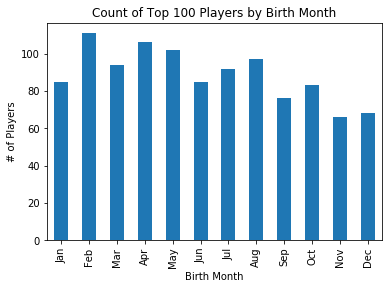

In [5]:
# Number of top 100 players by birth month.
players.groupby(players.birthdate.dt.month).size().plot(kind='bar')
_ = plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
_ = plt.xlabel('Birth Month')
_ = plt.ylabel('# of Players')
_ = plt.title('Count of Top 100 Players by Birth Month')

In [6]:
# Percentage of top 100 players by handedness
handedness = players.groupby('hand').size()
handedness['L'] / player_count, handedness['R'] / player_count

(0.1407269338303821, 0.8536812674743709)

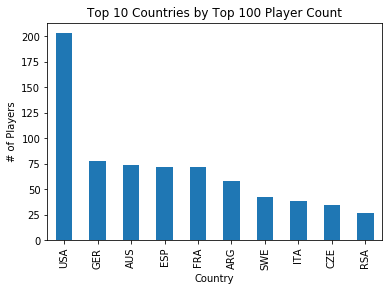

In [7]:
# Top 10 Countries by Top 100 Player Count
countries = players.groupby('country').size()
_ = countries.nlargest(10).plot(kind='bar')
_ = plt.xlabel('Country')
_ = plt.ylabel('# of Players')
_ = plt.title('Top 10 Countries by Top 100 Player Count')

In [8]:
############RANKINGS################

In [9]:
rankings = pd.read_csv('Resources/tennis_clean/atp_top_100_rankings.csv', index_col=['player_id', 'ranking_date'],
                       parse_dates=['ranking_date'])
rankings.head()

player_rank  points
player_id ranking_date                     
100011    1973-08-27            114     NaN
          1973-09-17            114     NaN
          1973-10-01            101     NaN
          1973-10-15             96     NaN
          1973-11-05            102     NaN

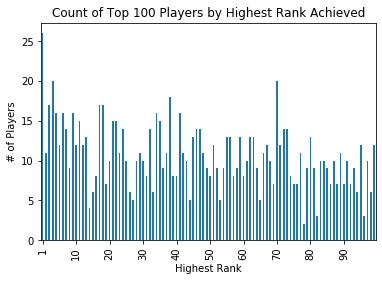

In [10]:
rankings['player_rank'].groupby('player_id').min().value_counts().sort_index().plot(kind='bar')
_ = plt.xticks(np.arange(10) * 10, [1, 10, 20, 30, 40, 50, 60, 70, 80, 90])
_ = plt.xlabel('Highest Rank')
_ = plt.ylabel('# of Players')
_ = plt.title('Count of Top 100 Players by Highest Rank Achieved')

In [11]:
# Percentage of Top 100 Players who never made top 50, or top 10.
player_highest_rank = rankings['player_rank'].groupby('player_id').min()
not_top_50 = player_highest_rank[player_highest_rank > 50].size
not_top_10 = player_highest_rank[player_highest_rank > 10].size
print(player_count - not_top_50, player_count - not_top_10)
not_top_50 / player_count, not_top_10 / player_count

601 157


(0.43988816402609504, 0.8536812674743709)

In [12]:
# Top 10 Players by Weeks at Number 1

top_10_weeks_at_number_1 = rankings[rankings.player_rank == 1].groupby('player_id').size().nlargest(10)
top_10_weeks_at_number_1_players = players.loc[top_10_weeks_at_number_1.index][['name_first', 'name_last']]
top_10_weeks_at_number_1_players['weeks_at_number_1'] = top_10_weeks_at_number_1
top_10_weeks_at_number_1_players

,name_first,name_last,weeks_at_number_1
player_id,,,
103819,Roger,Federer,307
101948,Pete,Sampras,285
104925,Novak,Djokovic,214
100656,Ivan,Lendl,205
104745,Rafael,Nadal,181
101736,Andre,Agassi,100
103720,Lleyton,Hewitt,80
101222,Stefan,Edberg,71
101793,Jim,Courier,58


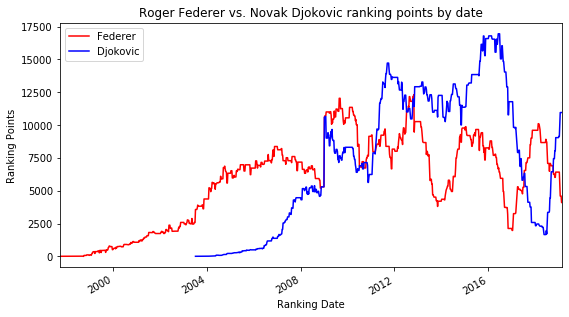

In [35]:
plt.rcParams['figure.figsize'] = [9, 5]

def player_id(first, last):
    return players.query('name_first == @first and name_last == @last').index[0]

_ = rankings.loc[player_id('Roger', 'Federer'), 'points'].plot(color='red')
_ = rankings.loc[player_id('Novak', 'Djokovic'), 'points'].plot(color='blue')
_ = plt.xlabel('Ranking Date')
_ = plt.ylabel('Ranking Points')
_ = plt.title('Roger Federer vs. Novak Djokovic ranking points by date')
_ = plt.legend(['Federer', 'Djokovic'])

In [26]:
pd.DataFrame(rankings.loc[player_id('Roger', 'Federer'), 'points'])['Dec 2008' : 'Jan 2009']

,points
ranking_date,
2008-12-01,5305.0
2008-12-08,5305.0
2008-12-15,5305.0
2008-12-22,5305.0
2008-12-29,5305.0
2009-01-05,10610.0
2009-01-12,10700.0
2009-01-19,10700.0
2009-01-26,10700.0


In [42]:
ranking_system_overhaul_date = 2009
pre_2009 = rankings.query('ranking_date < @ranking_system_overhaul_date').index
rankings.loc[pre_2009, 'points'] *= 2
rankings.loc[pre_2009]

player_rank  points
player_id ranking_date                     
100011    1973-08-27            114     NaN
          1973-09-17            114     NaN
          1973-10-01            101     NaN
          1973-10-15             96     NaN
          1973-11-05            102     NaN
...                             ...     ...
108360    1976-06-14            237     NaN
          1976-12-13            144     NaN
          1977-07-04            145     NaN
          1978-01-02            226     NaN
          1978-01-16            223     NaN

[397898 rows x 2 columns]

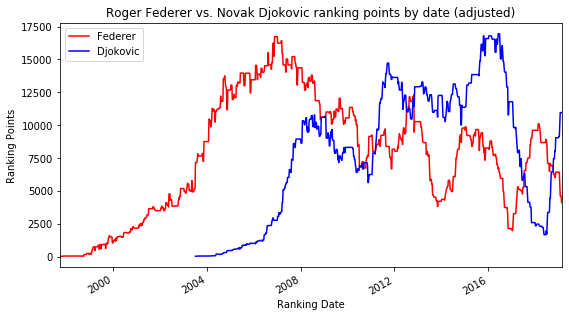

In [50]:
_ = rankings.loc[player_id('Roger', 'Federer'), 'points'].plot(color='red')
_ = rankings.loc[player_id('Novak', 'Djokovic'), 'points'].plot(color='blue')
_ = plt.xlabel('Ranking Date')
_ = plt.ylabel('Ranking Points')
_ = plt.title('Roger Federer vs. Novak Djokovic ranking points by date (adjusted)')
_ = plt.legend(['Federer', 'Djokovic'])

In [57]:
[(id, date) for id, date in rankings.index]
#DO THIS NEXT
#rankings['age'] = [time_diff(date, birthday(id) for id, date in rankings.index] or something like that

[(100011, Timestamp('1973-08-27 00:00:00')),
 (100011, Timestamp('1973-09-17 00:00:00')),
 (100011, Timestamp('1973-10-01 00:00:00')),
 (100011, Timestamp('1973-10-15 00:00:00')),
 (100011, Timestamp('1973-11-05 00:00:00')),
 (100011, Timestamp('1973-11-26 00:00:00')),
 (100011, Timestamp('1973-12-17 00:00:00')),
 (100011, Timestamp('1974-03-04 00:00:00')),
 (100011, Timestamp('1974-04-22 00:00:00')),
 (100011, Timestamp('1974-05-06 00:00:00')),
 (100011, Timestamp('1974-06-03 00:00:00')),
 (100011, Timestamp('1974-07-29 00:00:00')),
 (100011, Timestamp('1974-08-12 00:00:00')),
 (100011, Timestamp('1974-09-09 00:00:00')),
 (100011, Timestamp('1974-09-30 00:00:00')),
 (100011, Timestamp('1974-11-11 00:00:00')),
 (100011, Timestamp('1974-12-23 00:00:00')),
 (100011, Timestamp('1975-01-20 00:00:00')),
 (100011, Timestamp('1975-03-10 00:00:00')),
 (100011, Timestamp('1975-04-14 00:00:00')),
 (100011, Timestamp('1975-05-05 00:00:00')),
 (100011, Timestamp('1975-06-02 00:00:00')),
 (100011, 